In [39]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Customer Segmentation with RFM analysis and K-means Clustering

This notebook performs customer segmentation using RFM (Recency, Frequency, Monetary) analysis and K-means clustering. RFM analysis categorizes customers based on their purchase behavior, while K-means clustering identifies distinct customer segments based on similarity.

## Overview:

- RFM Analysis: Calculate RFM metrics (done using SQL query and imported to csv file), explore their distributions.

- K-means Clustering: Determine optimal cluster number, apply K-means to RFM data, analyze segment characteristics.

- Visualization and conclusion: Plot clusters using scatter plots for RFM variables, interpret results and assign meaningful names, summarize findings.

In [40]:
RFM=pd.read_csv('query_results//Recency_Frequency_Monetary.csv')
RFM.describe()

,Recency,Frequency,Monetary
count,95420.000000,95420.000000,95420.000000
mean,241.476169,1.034961,161.368042
std,153.155689,0.214869,372.232087
min,2.000000,1.000000,0.850000
25%,117.000000,1.000000,48.900000
50%,222.000000,1.000000,89.990000
75%,351.000000,1.000000,167.970000
max,727.000000,17.000000,60480.000000


In [41]:
RFM['customer_unique_id']=[int(x, 16)for x in RFM['customer_unique_id']]

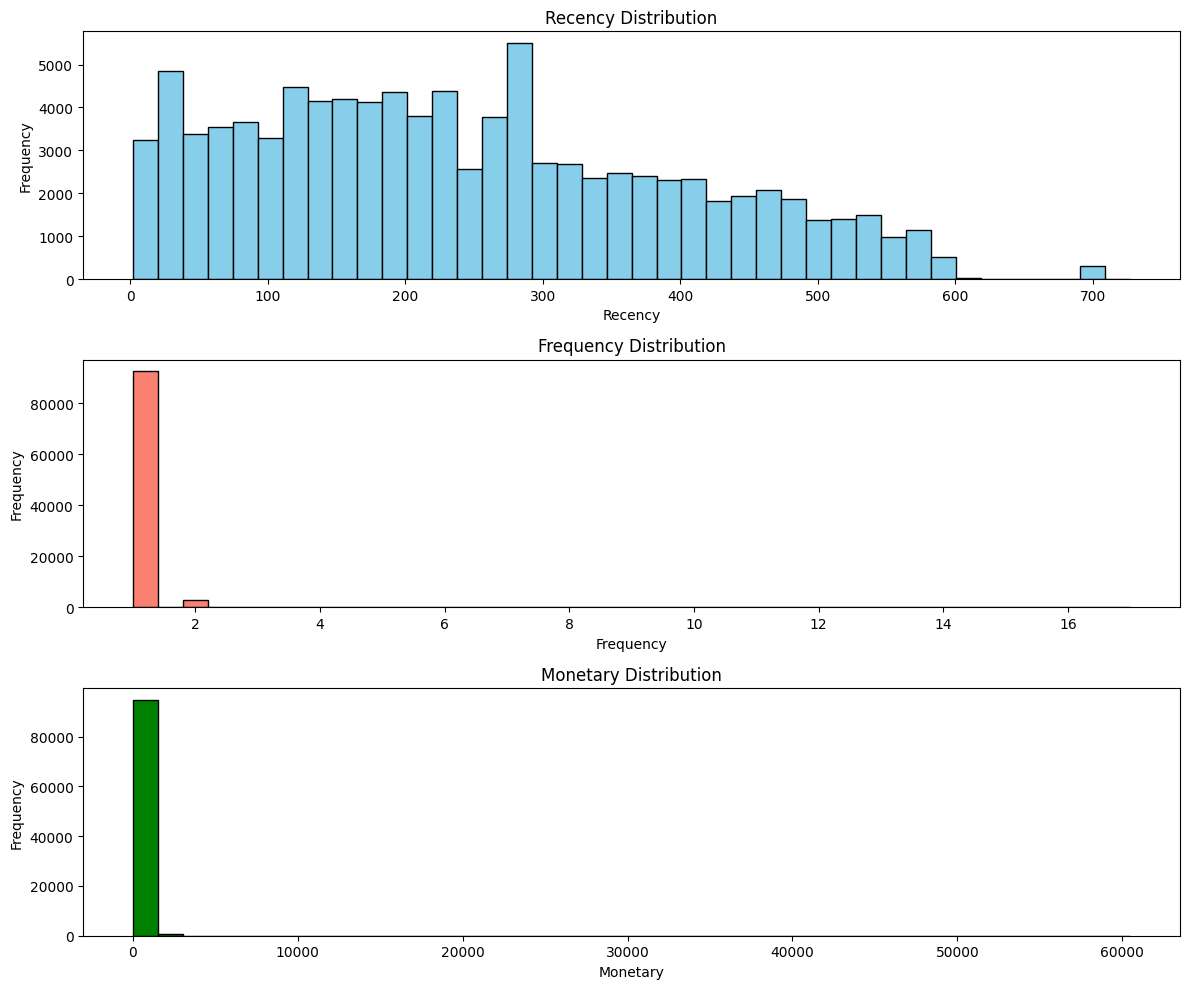

In [42]:
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plt.hist(RFM['Recency'], bins=40, color='skyblue', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2)
plt.hist(RFM['Frequency'], bins=40, color='salmon', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
plt.hist(RFM['Monetary'], bins=40, color='green', edgecolor='black')
plt.title('Monetary Distribution')
plt.xlabel('Monetary')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Scale the data using Z-Score Normalization

In [43]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(RFM)

#### I'll use the elbow method to choose the number of clusters. 

In [44]:
inertia=[]
for i in range(1,11):
    km=KMeans(n_clusters=i, n_init=10,random_state=10)
    km.fit(scaled_data)
    inertia.append(km.inertia_)


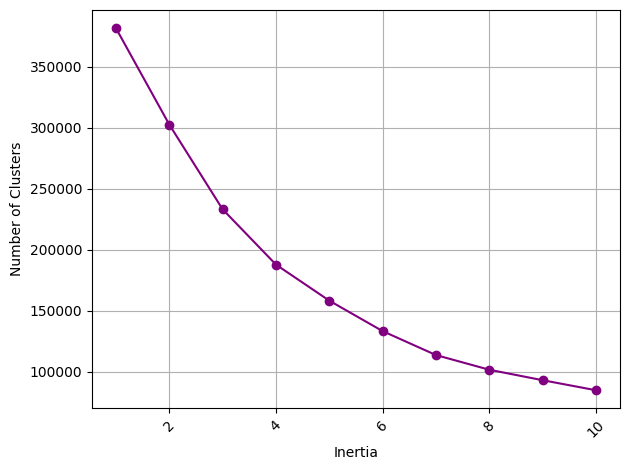

In [45]:

plt.plot(np.arange(1,11), inertia, color='purple', marker='o', linestyle='-') 
plt.xlabel('Inertia')
plt.ylabel('Number of Clusters')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


### The optimal number of clusters is 7

In [46]:
km=KMeans(n_clusters=7, n_init=15,random_state=9)
km.fit(scaled_data)


KMeans(n_clusters=7, n_init=15, random_state=9)

In [47]:
RFM['Cluster']=km.labels_


In [48]:
for i in range(0,7):
   print(f'Cluster {i}')
   print(RFM[RFM["Cluster"]==i].describe())
   print()



Cluster 0
            Recency  Frequency      Monetary  Cluster
count  26115.000000    26115.0  26115.000000  26115.0
mean     130.021520        1.0    131.819848      0.0
std       71.884225        0.0    143.747703      0.0
min        3.000000        1.0      2.200000      0.0
25%       67.000000        1.0     46.990000      0.0
50%      131.000000        1.0     89.900000      0.0
75%      191.000000        1.0    151.000000      0.0
max      260.000000        1.0   1099.000000      0.0

Cluster 1
            Recency  Frequency      Monetary  Cluster
count  18899.000000    18899.0  18899.000000  18899.0
mean     396.144558        1.0    133.101519      1.0
std       96.030010        0.0    147.952977      0.0
min      266.000000        1.0      2.290000      1.0
25%      311.000000        1.0     47.000000      1.0
50%      383.000000        1.0     89.000000      1.0
75%      470.000000        1.0    159.000000      1.0
max      727.000000        1.0   1199.000000      1.0

Cluste

#### Based on the characteristics of the clusters, we can order the clusters from "Lost Customers" (0) to "Loyal Customers" (6) by swapping the numerical values of clusters

In [49]:
# Create a mapping dictionary
cluster_names = {
    0: 3,
    1: 0,
    2: 4,
    3: 2,
    4: 1,
    5: 6,
    6: 5
}
# 
# Replace numerical cluster labels with names
RFM['Cluster'] = RFM['Cluster'].map(cluster_names)



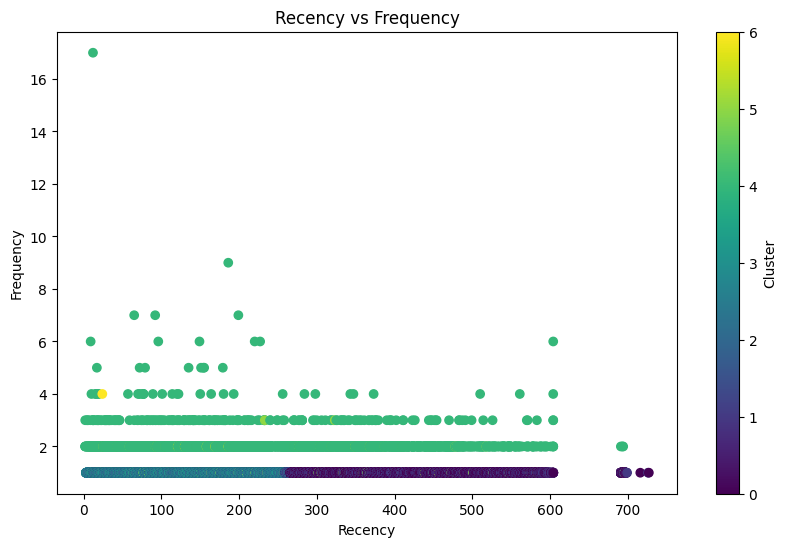

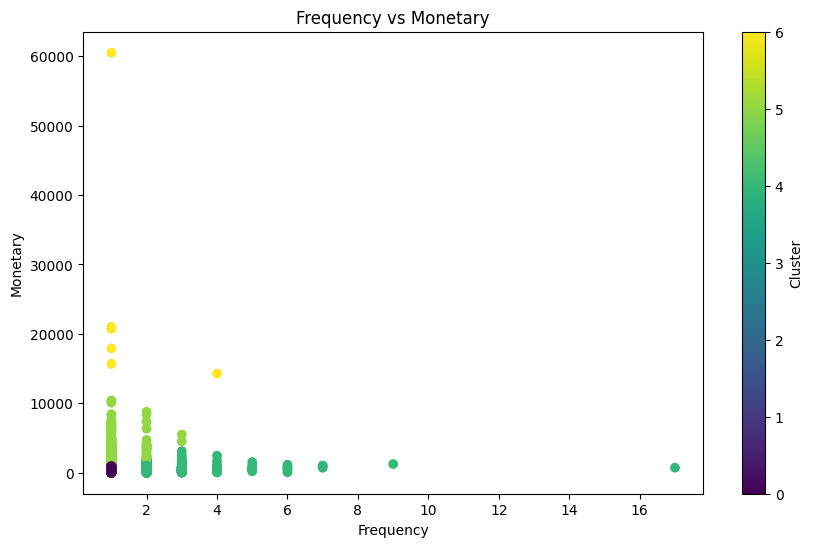

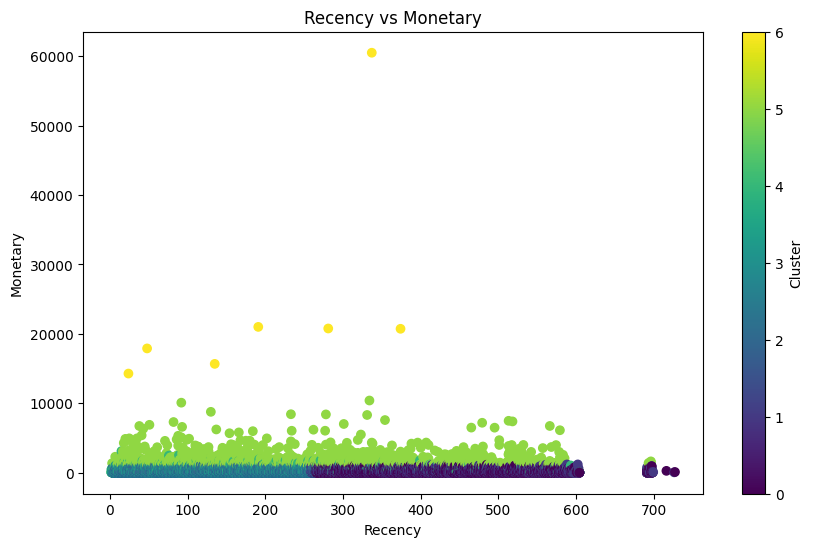

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(RFM['Recency'], RFM['Frequency'], c=RFM['Cluster'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency vs Frequency')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(RFM['Frequency'], RFM['Monetary'], c=RFM['Cluster'], cmap='viridis')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Frequency vs Monetary')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(RFM['Recency'], RFM['Monetary'], c=RFM['Cluster'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Recency vs Monetary')
plt.colorbar(label='Cluster')
plt.show()


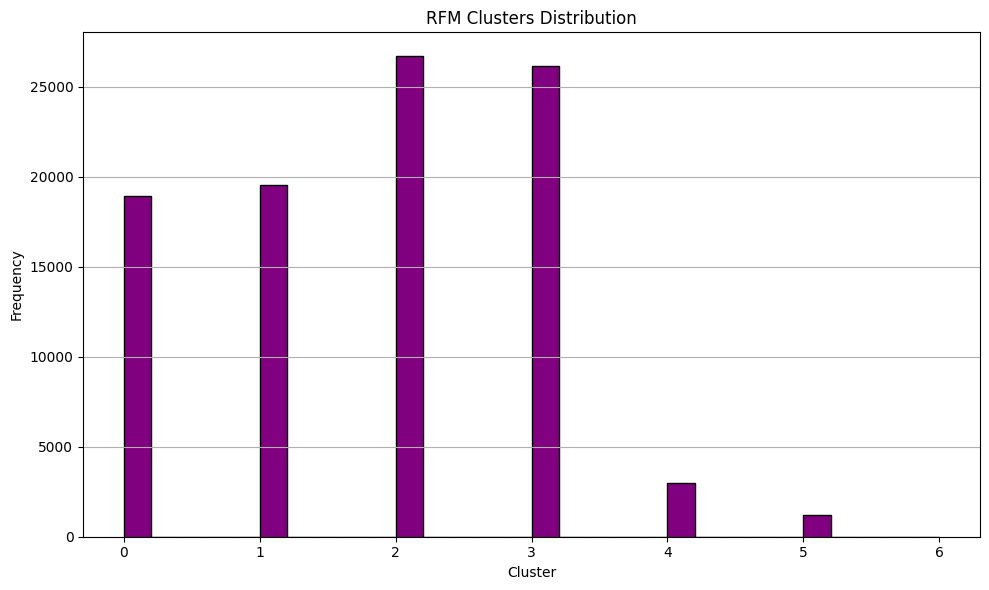

In [57]:
plt.figure(figsize=(10, 6))
plt.hist(RFM['Cluster'], bins=30, color='purple', edgecolor='black')
plt.title('RFM Clusters Distribution')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [65]:
(RFM['Cluster']>3).sum()/RFM['Cluster'].count()

0.043890169775728356

#### Approximately **4%** of the customer base can be classified as **loyal customers**.